# Interpretable Models

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 28/04/2025   | Martin | Created   | Notebook created for interpretable models. Completed Linear Regression | 
| 29/04/2025   | Martin | Update   | Completed Logistic Regression model interpretation | 

# Content

* [Linear Regression](#linear-regression)
* [Logistic Regression](#logistic-regression)

# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from statsmodels.regression.linear_model import OLS

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/bike_rental/day_cleaned.csv')

cols = [
  'season',
  'holiday',
  'workingday',
  'weather_rmp',
  'temp_cel',
  'rel_hum',
  'windspeed_kmh',
  'cnt_2d_bfr',
  'cnt'
]

df = df[cols]

In [3]:
# One-hot encode some columns
oh_cols = [
  'season',
  'holiday',
  'workingday',
  'weather_rmp'
]

enc = OneHotEncoder(handle_unknown='ignore')
X = df[oh_cols]
X = enc.fit_transform(X)
oh_X = pd.DataFrame(
  X.toarray(),
  columns=enc.get_feature_names_out(oh_cols)
)

# Concat back to main dataframe
oth_cols = [i for i in df.columns if i not in oh_cols]
df_oh = pd.concat([df[oth_cols], oh_X], axis=1)

In [4]:
df_oh.head()

,temp_cel,rel_hum,windspeed_kmh,cnt_2d_bfr,cnt,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_rmp_1,weather_rmp_2,weather_rmp_3
0,8.050924,43.7273,16.636703,985,1349,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,8.200000,59.0435,10.739832,801,1562,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,9.305237,43.6957,12.522300,1349,1600,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,8.378268,51.8261,6.000868,1562,1606,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,8.057402,49.8696,11.304642,1600,1510,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
y = df_oh['cnt']
X = df_oh.drop('cnt', axis=1)
X = sm.add_constant(X) # Adding the bias value

model = sm.OLS(y, X)
results = model.fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     202.3
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          3.69e-211
Time:                        11:13:43   Log-Likelihood:                -6024.4
No. Observations:                 728   AIC:                         1.207e+04
Df Residuals:                     716   BIC:                         1.213e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           569.8022    137.376      4.148      0.000     300.094     839.511
temp_cel         65.9474      9.450      6.979      0.000      47.395      84.500
rel_hum         -19.0701      3.595     -5.305      0.000     -26.128     -12.012
windspeed_kmh   -49.8011      7.473     -6.664      0.000     -64.472     -35.130
cnt_2d_bfr        0.5966      0.025     24.216      0.000       0.548       0.645
season_1        -75.5424     89.226     -0.847      0.397    -250.717      99.633
season_2        237.0209     77.921      3.042      0.002      84.040     390.002
season_3        -66.4258    111.090     -0.598      0.550    -284.527     151.676
season_4        474.7495     76.893      6.174      0.000     323.788     625.711
holiday_0       504.6740    111.038      4.545      0.000     286.675     722.673
holiday_1        65.1282    145.784      0.447      0.655    -221.088     351.344
workingday_0    136.4463     79.017      1.727      0.085     -18.686     291.579
workingday_1    433.3559     79.894      5.424      0.000     276.501     590.211
weather_rmp_1   960.9112     84.192     11.413      0.000     795.619    1126.203
weather_rmp_2   567.6875     87.849      6.462      0.000     395.214     740.161
weather_rmp_3  -958.7965    187.020     -5.127      0.000   -1325.970    -591.623
==============================================================================
Omnibus:                       23.728   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.762
Skew:                           0.188   Prob(JB):                     1.16e-10
Kurtosis:                       4.169   Cond. No.                     1.17e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Effects Plot

Weights of linear regression are affected by the actual feature values. The effect plot applies the predicted weights to all feature values before plotting various box plots to reveal their true impact on the model

In [7]:
plot_df = X.copy()

# Multiply to get effects
for col in plot_df.columns:
  plot_df[col] = plot_df[col] * results.params[col]

merged_oh = []
for col in oh_cols:
  subset = [i for i in plot_df.columns if i.startswith(col)]
  subset = plot_df[subset]
  merged_oh.append(subset.sum(axis=1))

merged_oh = pd.concat(
  merged_oh,
  axis=1
)
merged_oh.columns = oh_cols

oth_cols.remove('cnt')
df_plot = pd.concat([plot_df[oth_cols], merged_oh], axis=1)
df_plot

,temp_cel,rel_hum,windspeed_kmh,cnt_2d_bfr,season,holiday,workingday,weather_rmp
0,530.937839,-833.882185,-828.526204,587.681448,-75.542412,504.674,433.355888,960.911243
1,540.769019,-1125.963020,-534.855508,477.901360,-75.542412,504.674,433.355888,960.911243
2,613.656572,-833.279571,-623.624386,804.855099,-75.542412,504.674,433.355888,960.911243
3,552.525338,-988.326777,-298.849881,931.937483,-75.542412,504.674,433.355888,960.911243
4,531.365046,-951.016207,-562.983671,954.609458,-75.542412,504.674,433.355888,567.687512
...,...,...,...,...,...,...,...,...
723,687.228197,-1245.116562,-1168.279706,604.387113,-75.542412,504.674,433.355888,567.687512
724,684.973190,-1125.133473,-518.756056,263.114232,-75.542412,504.674,433.355888,567.687512
725,684.973190,-1435.817150,-415.025532,1261.277747,-75.542412,504.674,136.446319,567.687512
726,691.732803,-921.718876,-1170.351780,1846.572671,-75.542412,504.674,136.446319,960.911243


In [8]:
df_plot.columns

Index(['temp_cel', 'rel_hum', 'windspeed_kmh', 'cnt_2d_bfr', 'season',
       'holiday', 'workingday', 'weather_rmp'],
      dtype='object')

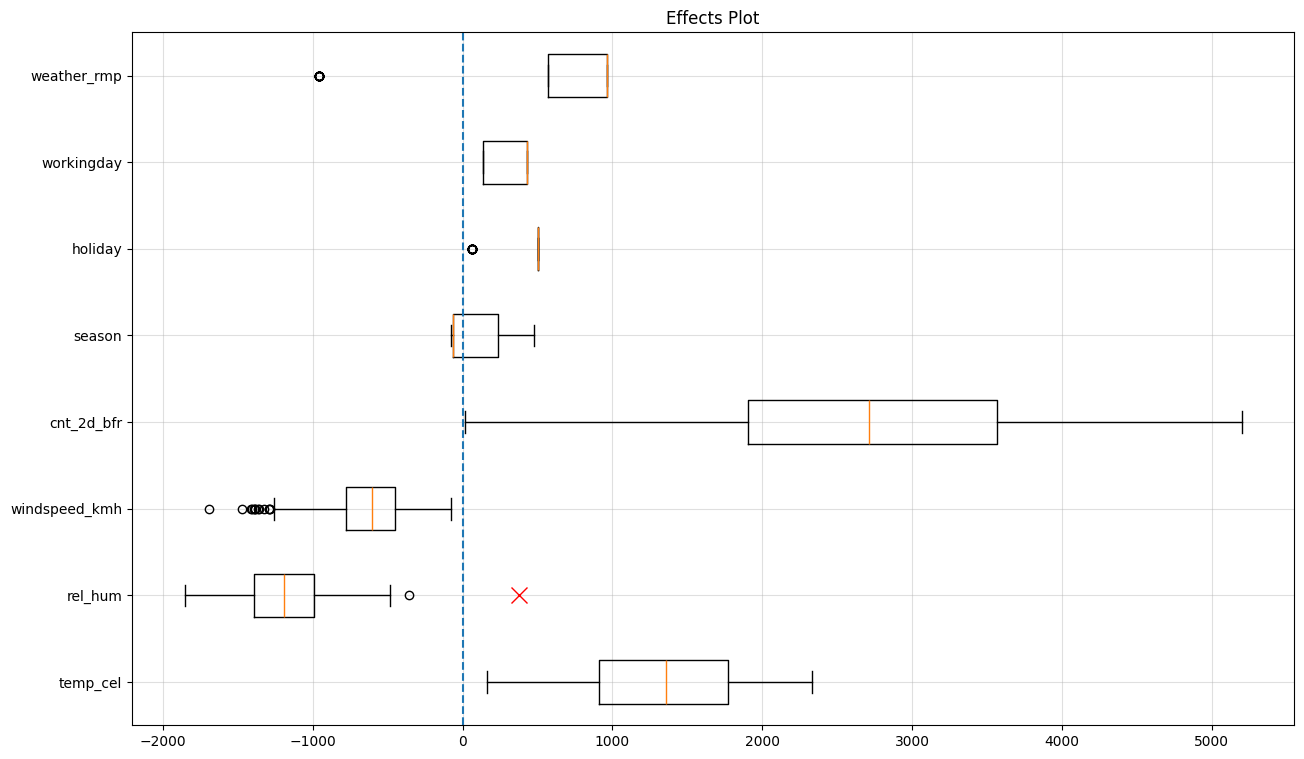

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.boxplot(df_plot, vert=False, tick_labels=df_plot.columns)
ax.set_title('Effects Plot')
ax.axvline(0, linestyle='--')
ax.grid(alpha=0.4)


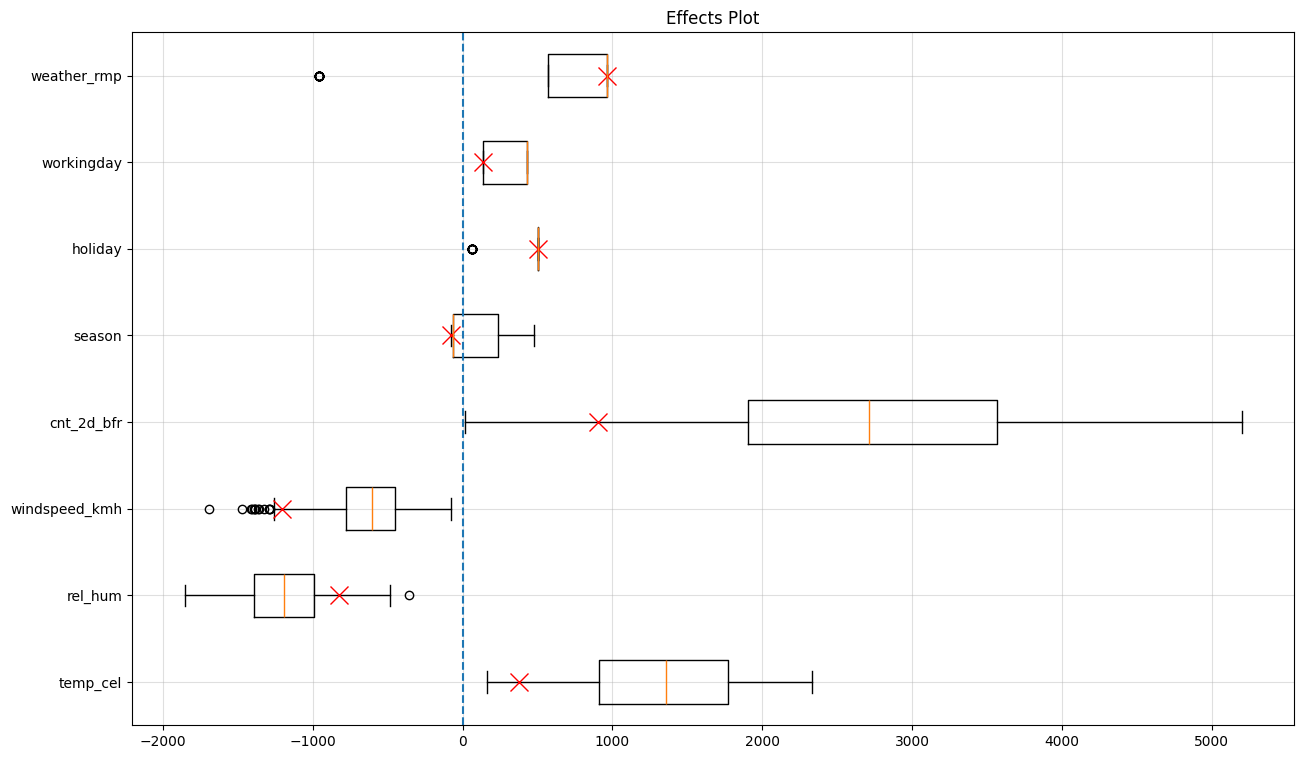

In [24]:
POINT = 6
fig, ax = plt.subplots(figsize=(15, 9))
ax.boxplot(df_plot, vert=False, tick_labels=df_plot.columns)
for i in range(1, 9):
  ax.plot(df_plot.iloc[POINT, i-1], i, 'rx', markersize=13)
ax.set_title('Effects Plot')
ax.axvline(0, linestyle='--')
ax.grid(alpha=0.4)

---

# Logistic Regression

In [15]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm

In [21]:
df = pd.read_csv('./data/penguins/penguins_cleaned.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [22]:
# Data Processing
df['sex'] = LabelEncoder().fit_transform(df['sex'])

# Select columns
cols = [i for i in df.columns if i not in ['species', 'island']]
df = df[cols]

In [24]:
y = df['sex']
X = df.drop('sex', axis=1)

In [25]:
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.354809
         Iterations 7


In [26]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.4881
Time:                        13:02:11   Log-Likelihood:                -118.15
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 1.431e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
culmen_length_mm      0.1368      0.041      3.344      0.001       0.057       0.217
culmen_depth_mm       0.8456      0.104      8.097      0.000       0.641       1.050
flipper_length_mm    -0.2242      0.025     -9.025      0.000      -0.273      -0.175
body_mass_g           0.0059      0.001      8.819      0.000       0.005       0.007
=====================================================================================
"""